# Exercises and Solutions - Session 6: Descriptive Statistics

In [ ]:
# for installing the required libraries from within a Jupyter notebook (may run for a few minutes)
%pip install matplotlib numpy sympy

## Exercise 3

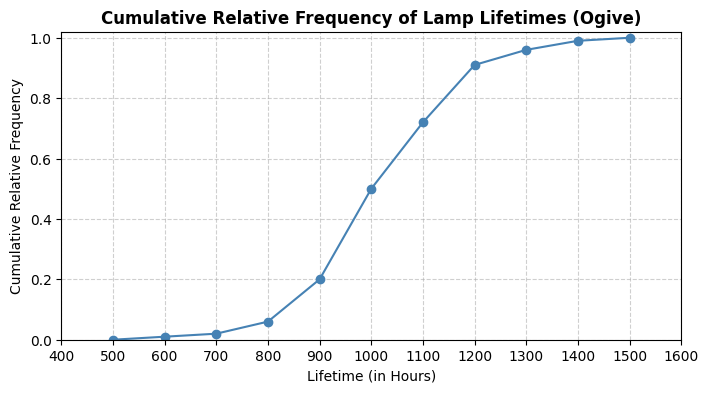

In [26]:
import matplotlib.pyplot as plt

# Data (midpoints of class intervals, cumulative relative frequencies)
lifetimes = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
cum_rel_freq = [0.0, 0.01, 0.02, 0.06, 0.20, 0.50, 0.72, 0.91, 0.96, 0.99, 1.0]

# Plot
plt.figure(figsize=(8,4))
plt.plot(lifetimes, cum_rel_freq, marker='o', linestyle='-', color='steelblue')

# Labels and title
plt.title("Cumulative Relative Frequency of Lamp Lifetimes (Ogive)", fontsize=12, weight='bold')
plt.xlabel("Lifetime (in Hours)")
plt.ylabel("Cumulative Relative Frequency")

# Axis limits and grid
plt.xticks([lifetimes[0]-100] + lifetimes + [lifetimes[-1]+100])
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


## Exercise 4

In [33]:
import numpy as np

ages = [18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 27, 27, 28, 30, 33, 35, 45, 55]


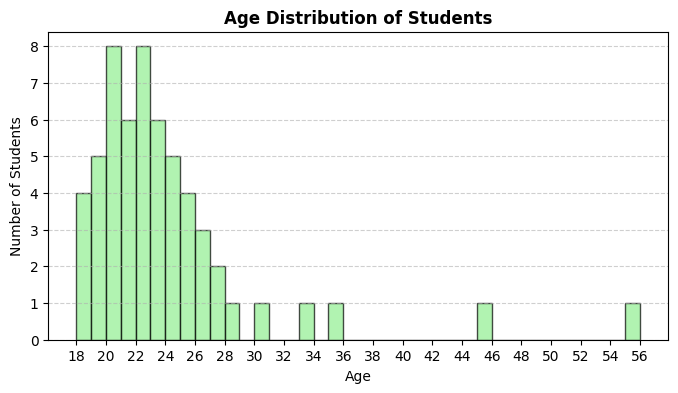

In [36]:
# Histogram
plt.figure(figsize=(8,4))
plt.hist(ages, bins=range(18, 57), edgecolor='black', color='lightgreen', alpha=0.7)

## Optional customizations
plt.title("Age Distribution of Students", fontsize=12, weight='bold')
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.xticks(range(18, 57, 2))
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [46]:
range_of_ages = max(ages) - min(ages)
print(f"Range of Ages: {range_of_ages}")

mean_age = np.mean(ages)
median_age = np.median(ages)
sample_variance = np.var(ages, ddof=1)  # Sample variance
standard_deviation = np.std(ages, ddof=1)  # Sample standard deviation
# ddof=1 is related to 'Bessel’s correction' -> using n-1 instead of n (notice the formula in the book)

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Standard Deviation: {standard_deviation:.2f}")

Range of Ages: 37
Mean Age: 23.60
Median Age: 22.0
Sample Variance: 38.74
Standard Deviation: 6.22


In [ ]:
p_10 = np.percentile(ages, 10)
p_90 = np.percentile(ages, 90)
iqr = np.percentile(ages, 75) - np.percentile(ages, 25)

print(f"10th Percentile: {p_10}")
print(f"90th Percentile: {p_90}")
print(f"Interquartile Range (IQR): {iqr}")

10th Percentile: 19.0
90th Percentile: 27.4
Interquartile Range (IQR): 5.0


In [52]:
# outliers
q1 = np.percentile(ages, 25)
q3 = np.percentile(ages, 75)
lower_bound_mild = q1 - 1.5 * iqr
upper_bound_mild = q3 + 1.5 * iqr
lower_bound_extreme = q1 - 3 * iqr
upper_bound_extreme = q3 + 3 * iqr
outliers_extreme = [age for age in ages if age < lower_bound_extreme or age > upper_bound_extreme]
outliers_mild = [age for age in ages if age < lower_bound_mild or age > upper_bound_mild and age not in outliers_extreme]
print(f"mild: {lower_bound_mild} | {upper_bound_mild}")
print(f"extreme: {lower_bound_extreme} | {upper_bound_extreme}")
print(f"Outliers: {outliers_extreme} (extreme), {outliers_mild} (mild)")

mild: 12.5 | 32.5
extreme: 5.0 | 40.0
Outliers: [45, 55] (extreme), [33, 35] (mild)


In [61]:
# Empirical Rule (normality check)
within1 = np.mean((ages >= mean_age - standard_deviation)   & (ages <= mean_age + standard_deviation))
within2 = np.mean((ages >= mean_age - 2*standard_deviation) & (ages <= mean_age + 2*standard_deviation))
within3 = np.mean((ages >= mean_age - 3*standard_deviation) & (ages <= mean_age + 3*standard_deviation))

print(f"1st SD: {mean_age - standard_deviation:.2f} to {mean_age + standard_deviation:.2f}")
print(f"2nd SD: {mean_age - 2*standard_deviation:.2f} to {mean_age + 2*standard_deviation:.2f}")
print(f"3rd SD: {mean_age - 3*standard_deviation:.2f} to {mean_age + 3*standard_deviation:.2f}")

print(f"Within 1 SD: {within1*100:.2f}%")
print(f"Within 2 SD: {within2*100:.2f}%")
print(f"Within 3 SD: {within3*100:.2f}%")

1st SD: 17.37 to 29.82
2nd SD: 11.15 to 36.05
3rd SD: 4.92 to 42.27
Within 1 SD: 91.23%
Within 2 SD: 96.49%
Within 3 SD: 96.49%


## Exercise 5

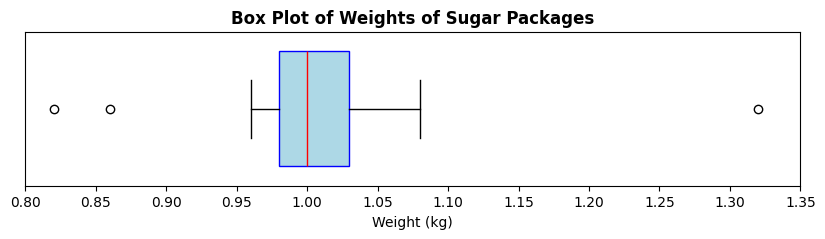

In [88]:
import numpy as np
import matplotlib.pyplot as plt

weights = [
    1.00,
    1.01,
    1.05,
    0.99,
    0.97,
    1.01,
    0.98,
    0.99,
    1.06,
    1.06,
    0.96,
    1.00,
    1.03,
    0.97,
    1.00,
    0.99,
    1.08,
    1.01,
    1.32,
    0.82,
    0.86,
]

plt.figure(figsize=(10, 2))
plt.boxplot(
    weights,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Box Plot of Weights of Sugar Packages", fontsize=12, weight="bold")
plt.xlabel("Weight (kg)")

plt.xlim(0.8, 1.35)
plt.ylim(0.9, 1.1)
plt.xticks(np.arange(0.8, 1.36, 0.05))

# hide y-axis
plt.gca().yaxis.set_visible(False)
plt.show()

In [ ]:
# Just for checking the estimates with real calculations
q1 = np.percentile(weights, 25)
q3 = np.percentile(weights, 75)

print(f"Q1: {q1:.2f}, Q3: {q3:.2f}")

range_of_weights = max(weights) - min(weights)
print(f"Range of Weights: {range_of_weights:.2f}")

Q1: 0.98, Q3: 1.03
Range of Weights: 0.50
Skewness: 0.08


## Exercise 6

In [112]:
import numpy as np

# This code breaks for example the DRY principle but it is simple-ish this way

def empirical_rule_analysis(data):
    data = np.array(data, dtype=float)
    mean = np.mean(data)
    sd = np.std(data, ddof=1)

    if sd == 0:
        return "not normal"

    # proportions
    p1 = np.mean((data >= mean - sd) & (data <= mean + sd))
    p2 = np.mean((data >= mean - 2*sd) & (data <= mean + 2*sd))
    p3 = np.mean((data >= mean - 3*sd) & (data <= mean + 3*sd))
    
    # print results
    print(f"Mean: {mean:.2f}, Standard Deviation: {sd:.2f}")
    print(f"Within 1 SD: {p1*100:.2f}%")
    print(f"Within 2 SD: {p2*100:.2f}%")
    print(f"Within 3 SD: {p3*100:.2f}%")

In [113]:
print("\n=== Exam Scores Analysis ===")
exam_scores = [55, 60, 62, 65, 68, 70, 72, 75, 78, 80, 82, 85, 88, 90, 92, 95]
empirical_rule_analysis(exam_scores)

print("\n=== Daily Steps Analysis ===")
daily_steps = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
empirical_rule_analysis(daily_steps)



=== Exam Scores Analysis ===
Mean: 76.06, Standard Deviation: 12.18
Within 1 SD: 62.50%
Within 2 SD: 100.00%
Within 3 SD: 100.00%

=== Daily Steps Analysis ===
Mean: 9.00, Standard Deviation: 3.89
Within 1 SD: 53.85%
Within 2 SD: 100.00%
Within 3 SD: 100.00%
